### Twitter Word Cloud

A program for generating tweet based word clouds. Specifically in regards to the _cleaned_, geo-tagged Twitter data from April 12 to 22 of 2013.

The program may be easily altered to create any number of word clouds given an input txt file. A csv file may be used as well, the relavent information from which is parsed and saved into a txt file for use by the word cloud function.

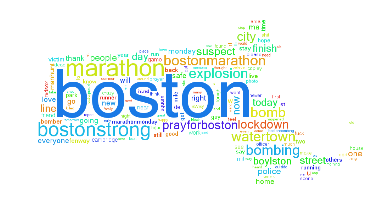

In [8]:
# Author: Elizabeth Brooks
# Date Modified: 06/24/2015
# Edited: Hayden Fuss
## Note: font_path for WordCloud is specific for Mac, 
## must be changed to run on other os's

# PreProcessor Directives
%matplotlib inline
import matplotlib
import csv
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from scipy.misc import imread
import re

# add parent directory to path so we can import twc
import os
import sys
sys.path.append(os.path.realpath('../'))
import twitter_criteria as twc

twc.loadCriteria()

keyword = twc.getKeywordRegex()

twc.clearCriteria()

# The markup and the cleanUpTweet function will eventually be
# moved to twc
twitter_markup = ['&amp;', 'http://t.co/']

def cleanUpTweet(tweet):
    temp = tweet.lower()
    # goes through list of crap thats in tweets and uses
    # re to replace them with nothing
    for s in twitter_markup:
        temp = re.sub(s, r"", temp)
    return temp
        
def tweetHasAKeyword(tweet):
    return keyword.search(tweet) is not None

# Function for generating a word cloud
def tweetWordCloud(filepath):
    # Read in the txt file set by the main method
    text = open(filepath, 'r').read()
    # Generate the word cloud
    mass_mask = imread('mass_map.png')
    wc = WordCloud(mask=mass_mask, background_color='white', max_words=150, 
                   font_path='/Library/Fonts/Microsoft Sans Serif.ttf').generate(text)
    # Open a plot of the generated word cloud
    wc.to_file('cloud.png')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
# End tweetWordCloud

# The main method
def main():
    filepath = os.getcwd() + '/OutputTweets.txt'
    # Create object for writting to a text file
    tweetFile = open(filepath, "w")
    # Iterate through the "cleaned" Twitter data by tweet
    with open(os.getcwd() + '/../cleaned_geo_tweets_Apr_12_to_22.csv') as csvfile:  
        tweetIt = csv.DictReader(csvfile)
        # Retrieve the strings of tweets
        for twitterData in tweetIt:
            # Convert tweets to lower case to pool words of the same spelling
            tweet_text = cleanUpTweet(twitterData['tweet_text'])
            # Write the selected Twitter data, tweets, to the txt file
            if tweetHasAKeyword(tweet_text):
                tweetFile.write(tweet_text)

    # Close the file obj
    tweetFile.close()
    
    # Use the defined function to create the tweet word cloud
    tweetWordCloud(filepath)
# End main

if __name__ == "__main__":
    main()

The above code creates a file object and opens a txt file to store all the strings of tweets contained in the Twitter data from the "cleaned" tweets csv file. The tweet strings are then retrieved from the csv file by iterating through the tweet hashes made by the DictReader. Finally, these strings are converted to lower case. This is because we are interested in looking at the occurances of a given spelling of a word, regardless of case; stemming may be considered in the future to combine the frequencies of all conjugate forms of a words.

The above function generates a word cloud based on words in the txt file created in the main method.

For more info: https://github.com/amueller/word_cloud